In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import matplotlib
%matplotlib inline

Using TensorFlow backend.


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_curve, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import Model
import sys

In [3]:
sys.path.append('../odcd/cd/')

In [6]:
df = pd.read_csv('/home/fdz/git/concept_drift_exps/data/musk/data/musk_csv.csv')

In [7]:
print(df.shape)
df.head()

(6598, 170)


,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [8]:
df['class'].value_counts() / len(df)

0    0.845862
1    0.154138
Name: class, dtype: float64

In [9]:
features = [col for col in df.columns if col not in ['ID', 'molecule_name', 'conformation_name', 'class']]
target = 'class'

In [10]:
X, y = df[features], df[target]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
scale = True
if scale:
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

/home/fdz/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [13]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(4948, 166) (1650, 166)
(4948,) (1650,)


# Logistic

In [14]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

/home/fdz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
preds_train, preds_test = lg.predict(X_train), lg.predict(X_test)

In [16]:
confusion_matrix(y_train, preds_train)

array([[4145,   59],
       [ 240,  504]])

In [17]:
confusion_matrix(y_test, preds_test)

array([[1349,   28],
       [  83,  190]])

In [18]:
accuracy_score(y_test, preds_test)

0.9327272727272727

In [19]:
accuracy_score(y_train, preds_train)

0.9395715440582053

# xg and features importance

In [20]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [21]:
accuracy_score(y_test, xgb.predict(X_test))

0.9648484848484848

In [22]:
imp = xgb.get_booster().get_score(importance_type='total_gain')

In [23]:
import operator
sorted_imp = sorted(imp.items(), key=operator.itemgetter(1), reverse=True)

In [24]:
sorted_imp

[('f35', 2025.26330589),
 ('f162', 1497.5108816299996),
 ('f123', 694.1324720499999),
 ('f125', 676.43216878),
 ('f8', 639.9446623200001),
 ('f150', 596.9024362499999),
 ('f131', 551.184911713),
 ('f65', 526.3617205199998),
 ('f121', 519.4723354),
 ('f110', 461.8523139999999),
 ('f91', 388.13815883999996),
 ('f0', 375.7654980700001),
 ('f62', 342.59625538000006),
 ('f143', 288.35494862999997),
 ('f32', 281.84323297199995),
 ('f30', 280.49445182),
 ('f25', 263.6450346),
 ('f57', 254.90224066),
 ('f109', 244.92138477),
 ('f82', 223.88158716000007),
 ('f71', 215.19040021),
 ('f164', 196.7071971),
 ('f90', 194.53804958999999),
 ('f139', 192.19375184999998),
 ('f13', 175.22787651),
 ('f104', 175.14661800000002),
 ('f42', 150.66357325),
 ('f87', 150.10613825000001),
 ('f101', 145.2152671),
 ('f58', 141.7638082),
 ('f115', 137.7741088),
 ('f34', 132.1112904),
 ('f66', 131.08903066000002),
 ('f140', 122.80477912399999),
 ('f54', 119.86926270000001),
 ('f60', 118.53390886000003),
 ('f20', 115.6

In [25]:
tr = int(0.25 * len(sorted_imp))
tr

28

In [26]:
top_25 = [t[0] for t in sorted_imp[:tr]]

In [27]:
bottom_25 = [t[0] for t in sorted_imp[-tr:]]

# NN

In [28]:
X.shape

(6598, 166)

In [29]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [30]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(4948, 166) (1650, 166)
(4948, 2) (1650, 2)


In [31]:
def model():
    
    x_in = tf.keras.layers.Input(shape=(166, ))
    x = tf.keras.layers.Dense(200, activation='relu')(x_in)
    #x = tf.keras.layers.Dense(50, activation='relu')(x_in)
    out = tf.keras.layers.Dense(2, activation='softmax')(x)
    clf = tf.keras.models.Model(x_in, out)
    clf.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    
    clf.summary()
    return clf

In [32]:
clf = model()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 166)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               33400     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 402       
Total params: 33,802
Trainable params: 33,802
Non-trainable params: 0
_________________________________________________________________


In [33]:
clf.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Train on 4948 samples, validate on 1650 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
4948/4948 [==============================] - 0s 56us/sample - loss: 0.2978 - acc: 0.8854 - val_loss: 0.2327 - val_acc: 0.9218
Epoch 2/100
4948/4948 [==============================] - 0s 34us/sample - loss: 0.2042 - acc: 0.9266 - val_loss: 0.2204 - val_acc: 0.9182
Epoch 3/100
4948/4948 [==============================] - 0s 34us/sample - loss: 0.1850 - acc: 0.9297 - val_loss: 0.1799 - val_acc: 0.9327
Epoch 4/100
4948/4948 [==============================] - 0s 33us/sample - loss: 0.1690 - acc: 0.9376 - val_loss: 0.2091 - val_acc: 0.9242
Epoch 5/100
4948/4948 [==============================] - 0s 36us/sample - loss: 0.1632 - acc: 0.9386 - val_loss: 0.1551 - val_acc: 0.9424
Epoch 6/100
4948/4948 [==============================] - 0s 35us/sample - loss: 0.1406 - acc: 0.9456 - val_loss: 0.1485 - val_acc: 0.9479
Epoch 7/100
4948/4948 [==============================] - 0s 35us/sample - lo

Epoch 58/100
4948/4948 [==============================] - 0s 41us/sample - loss: 0.0146 - acc: 0.9945 - val_loss: 0.0290 - val_acc: 0.9867
Epoch 59/100
4948/4948 [==============================] - 0s 37us/sample - loss: 0.0094 - acc: 0.9974 - val_loss: 0.0383 - val_acc: 0.9836
Epoch 60/100
4948/4948 [==============================] - 0s 34us/sample - loss: 0.0117 - acc: 0.9964 - val_loss: 0.0310 - val_acc: 0.9891
Epoch 61/100
4948/4948 [==============================] - 0s 37us/sample - loss: 0.0077 - acc: 0.9986 - val_loss: 0.0365 - val_acc: 0.9848
Epoch 62/100
4948/4948 [==============================] - 0s 35us/sample - loss: 0.0112 - acc: 0.9962 - val_loss: 0.0321 - val_acc: 0.9879
Epoch 63/100
4948/4948 [==============================] - 0s 36us/sample - loss: 0.0080 - acc: 0.9988 - val_loss: 0.0381 - val_acc: 0.9848
Epoch 64/100
4948/4948 [==============================] - 0s 37us/sample - loss: 0.0068 - acc: 0.9992 - val_loss: 0.0275 - val_acc: 0.9891
Epoch 65/100
4948/4948 [===

In [34]:
preds_train = clf.predict(X_train)
preds_test = clf.predict(X_test)

In [35]:
accuracy_score(np.argmax(y_train, axis=1), np.argmax(preds_train, axis=1))

1.0

In [36]:
accuracy_score(np.argmax(y_test, axis=1), np.argmax(preds_test, axis=1))

0.9927272727272727

# features permutation

In [37]:
X_test_perm_top = X_test.copy()
X_test_perm_bot = X_test.copy()

In [38]:
X_test_perm_top[:, idxs_top_25] = X_test_perm_top[:, perm_top]
X_test_perm_bot[:, idxs_bottom_25] = X_test_perm_bot[:, perm_bot]

NameError: name 'perm_top' is not defined

In [ ]:
accuracy_score(np.argmax(y_test, axis=1), np.argmax(clf.predict(X_test_perm_top), axis=1))

In [ ]:
accuracy_score(np.argmax(y_test, axis=1), np.argmax(clf.predict(X_test_perm_bot), axis=1))

In [ ]:
accuracy_score(np.argmax(y_test, axis=1), np.argmax(clf.predict(X_test), axis=1))

# Vae

In [41]:
from importlib import reload

In [62]:
def sample_window(X_test, y_test, window):
    samples_rnd = np.random.choice(range(len(X_test)), window, replace=False)
    X_test_samples = X_test[samples_rnd, :]
    y_test_samples = y_test[samples_rnd]
    return X_test_samples, y_test_samples

In [42]:
import model_symmetries as vsf

In [43]:
reload(vsf)

<module 'model_symmetries' from '../odcd/cd/model_symmetries.py'>

In [44]:
X_train.shape

(4948, 166)

In [48]:
vae = vsf.VaeSymmetryFinder(clf, input_shape=(166,), output_shape=(2, ), intermediate_dim=1024, output_activation='linear')

Vae
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 166)          0                                            
__________________________________________________________________________________________________
reshape_2 (Reshape)             (None, 166)          0           encoder_input[0][0]              
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 1024)         171008      reshape_2[0][0]                  
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            2050        dense_8[0][0]                    
__________________________________________________________________________________________________
z_log_

In [49]:
vae.fit(X_train, x_test=X_test, epochs=200)

Train on 4948 samples, validate on 1650 samples
Epoch 1/200
4948/4948 [==============================] - 1s 150us/sample - loss: 0.7333 - val_loss: 0.3928
Epoch 2/200
4948/4948 [==============================] - 0s 62us/sample - loss: 0.3249 - val_loss: 0.2170
Epoch 3/200
4948/4948 [==============================] - 0s 62us/sample - loss: 0.2332 - val_loss: 0.1876
Epoch 4/200
4948/4948 [==============================] - 0s 61us/sample - loss: 0.1742 - val_loss: 0.1478
Epoch 5/200
4948/4948 [==============================] - 0s 63us/sample - loss: 0.1655 - val_loss: 0.1514
Epoch 6/200
4948/4948 [==============================] - 0s 63us/sample - loss: 0.1668 - val_loss: 0.1606
Epoch 7/200
4948/4948 [==============================] - 0s 65us/sample - loss: 0.1515 - val_loss: 0.1540
Epoch 8/200
4948/4948 [==============================] - 0s 65us/sample - loss: 0.1321 - val_loss: 0.0998
Epoch 9/200
4948/4948 [==============================] - 0s 66us/sample - loss: 0.1089 - val_loss: 0.09

4948/4948 [==============================] - 0s 70us/sample - loss: 0.0127 - val_loss: 0.1326
Epoch 153/200
4948/4948 [==============================] - 0s 70us/sample - loss: 0.0327 - val_loss: 0.0650
Epoch 154/200
4948/4948 [==============================] - 0s 70us/sample - loss: 0.0099 - val_loss: 0.0307
Epoch 155/200
4948/4948 [==============================] - 0s 72us/sample - loss: 0.0052 - val_loss: 0.0076
Epoch 156/200
4948/4948 [==============================] - 0s 75us/sample - loss: 0.0089 - val_loss: 0.0245
Epoch 157/200
4948/4948 [==============================] - 0s 68us/sample - loss: 0.0335 - val_loss: 0.0350
Epoch 158/200
4948/4948 [==============================] - 0s 70us/sample - loss: 0.0164 - val_loss: 0.0682
Epoch 159/200
4948/4948 [==============================] - 0s 70us/sample - loss: 0.0099 - val_loss: 0.0169
Epoch 160/200
4948/4948 [==============================] - 0s 69us/sample - loss: 0.0023 - val_loss: 0.0075
Epoch 161/200
4948/4948 [=================

In [50]:
from scipy.stats import entropy

In [51]:
vae_outs_test = vae.vae.predict(X_test)
symm_samples_test = vae_outs_test[0]
orig_preds_test = vae_outs_test[1]
trans_preds_test = vae_outs_test[2]
    
kl_test = entropy(orig_preds_test.T, trans_preds_test.T)
kl_test[np.where(kl_test == np.inf)] = 0
baseline_std_plus = kl_test.mean() + kl_test.std()
baseline_std_minus = kl_test.mean() - kl_test.std()

In [52]:
baseline_std_plus

0.066649504

In [53]:
idxs_rnd = np.random.choice(range(len(features)), 30)

In [54]:
idxs_rnd_perm = np.random.permutation(idxs_rnd)

In [55]:
X_test_perm = X_test.copy()

In [56]:
X_test_perm[:, idxs_rnd] = X_test_perm[:, idxs_rnd_perm]

In [66]:
y_test = np.argmax(y_test, axis=1)

In [76]:
mean_test = []
std_test = []
accs_test = []
baseline_stds_plus = []
baseline_stds_minus = []
window = 1000
for step in range(100):
    if step < 99:
        x_window, y_window = sample_window(X_test, y_test, window)
        vae_outs_test = vae.vae.predict(x_window)
        symm_samples_test = vae_outs_test[0]
        orig_preds_test = vae_outs_test[1]
        trans_preds_test = vae_outs_test[2]
    
        kl_test = entropy(orig_preds_test.T, trans_preds_test.T)
        mean_test.append(kl_test.mean())
        std_test.append(kl_test.std())
        preds_test = np.argmax(orig_preds_test, axis=1)
        accs_test.append(accuracy_score(preds_test, y_window))
    
        baseline_stds_plus.append(baseline_std_plus)
        baseline_stds_minus.append(baseline_std_minus)
    else:
        for i in range(0, len(features)):
            x_window, y_window = sample_window(X_test, y_test, window)
            X_test_perm = x_window.copy()
            idxs_rnd = np.random.choice(range(len(features)), i, replace=False)
            idxs_rnd_perm = np.random.permutation(idxs_rnd)
            #X_test_perm[:, idxs_rnd] = 0
            X_test_perm[:, idxs_rnd] = X_test_perm[:, idxs_rnd_perm]
            print('Number of permuted feats: {} '.format(i))
        
            vae_outs_test = vae.vae.predict(X_test_perm)
            symm_samples_test = vae_outs_test[0]
            orig_preds_test = vae_outs_test[1]
            trans_preds_test = vae_outs_test[2]
            kl_test = entropy(orig_preds_test.T, trans_preds_test.T)
            kl_test[np.where(kl_test == np.inf)] = 0
    
            mean_test.append(kl_test.mean())
            std_test.append(kl_test.std())
    
            preds_test = np.argmax(orig_preds_test, axis=1)
            accs_test.append(accuracy_score(preds_test, y_window))
    
            baseline_stds_plus.append(baseline_std_plus)
            baseline_stds_minus.append(baseline_std_minus)

Number of permuted feats: 0 
Number of permuted feats: 1 
Number of permuted feats: 2 
Number of permuted feats: 3 
Number of permuted feats: 4 
Number of permuted feats: 5 
Number of permuted feats: 6 
Number of permuted feats: 7 
Number of permuted feats: 8 
Number of permuted feats: 9 
Number of permuted feats: 10 
Number of permuted feats: 11 
Number of permuted feats: 12 
Number of permuted feats: 13 
Number of permuted feats: 14 
Number of permuted feats: 15 
Number of permuted feats: 16 
Number of permuted feats: 17 
Number of permuted feats: 18 
Number of permuted feats: 19 
Number of permuted feats: 20 
Number of permuted feats: 21 
Number of permuted feats: 22 
Number of permuted feats: 23 
Number of permuted feats: 24 
Number of permuted feats: 25 
Number of permuted feats: 26 
Number of permuted feats: 27 
Number of permuted feats: 28 
Number of permuted feats: 29 
Number of permuted feats: 30 
Number of permuted feats: 31 
Number of permuted feats: 32 
Number of permuted f

In [77]:
df = pd.DataFrame()
df['accuracy'] = accs_test
df['entropy_mean'] = mean_test
df['entropy_std'] = std_test
df['baseline_std_plus'] = baseline_stds_plus
df['baseline_std_minus'] = baseline_stds_minus

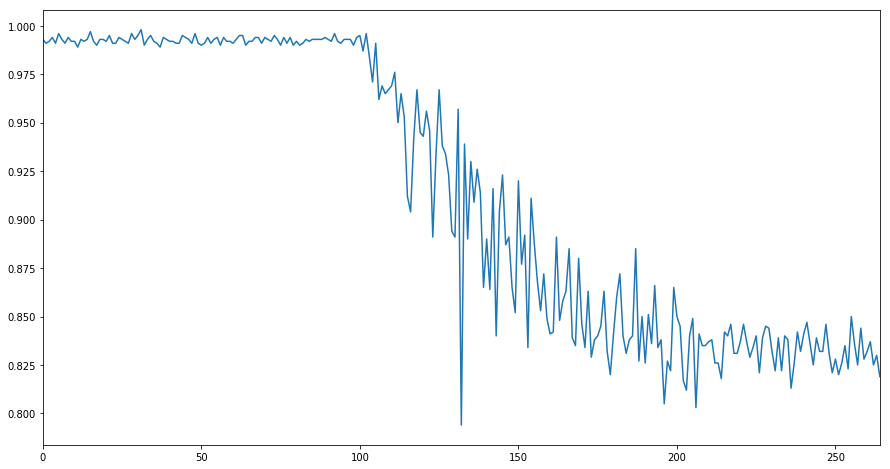

In [80]:
df['accuracy'].plot(logy = False, subplots=False, figsize = (15, 8))